# Libraries

In [174]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as msno
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

In [2]:
print("All the required libraries are loaded successfully!!")

All the required libraries are loaded successfully!!


# Dataset

In [3]:
url="/content/drive/MyDrive/project/Housing.csv"
data=pd.read_csv(url)
print("The dataset is loaded successfully!!")

The dataset is loaded successfully!!


In [4]:
print("The dataset of housing is given by \n")
data[:]

The dataset of housing is given by 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Details of the above dataset

## 1. Shape (numbers of rows and columns in the dataset) 

In [5]:
rows = data.shape[0]
columns = data.shape[1]

print("The number of rows in the above dataset is: \n",rows)

print("\n The number of columns in the above dataset is: \n",columns)

shape=data.shape
print("\n Therefore the shape of the dataset is given by: ")
print(shape)

The number of rows in the above dataset is: 
 545

 The number of columns in the above dataset is: 
 13

 Therefore the shape of the dataset is given by: 
(545, 13)


## 2. Columns names 

In [6]:
col_names = data.columns.values
print("The names of the columns is given by : \n \n ",col_names)

The names of the columns is given by : 
 
  ['price' 'area' 'bedrooms' 'bathrooms' 'stories' 'mainroad' 'guestroom'
 'basement' 'hotwaterheating' 'airconditioning' 'parking' 'prefarea'
 'furnishingstatus']


## 3. Data information

In [7]:
print("The information of the given dataset is given by: \n")

data.info()

The information of the given dataset is given by: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## 4. Data Types 

In [8]:
print("The datatypes of the given dataset is given by: \n")

data.dtypes

The datatypes of the given dataset is given by: 



price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

## 5. Data Summary

In [9]:
print("The summary of the above dataset is given by: ")

data.describe()

The summary of the above dataset is given by: 


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## 6. Total numbers of values in a particular columns

In [10]:
data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

## 7. Null Values

In [11]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

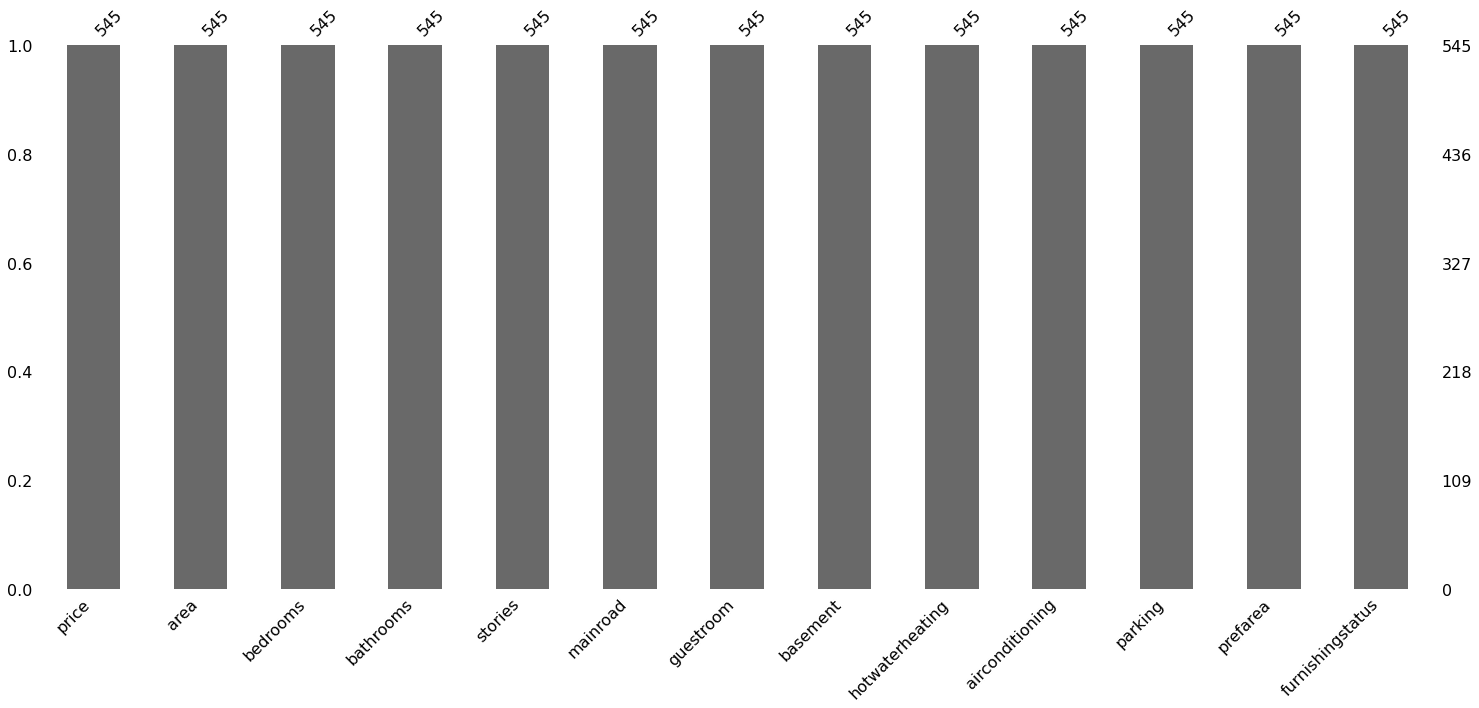

In [12]:
msno.bar(data)
plt.show()

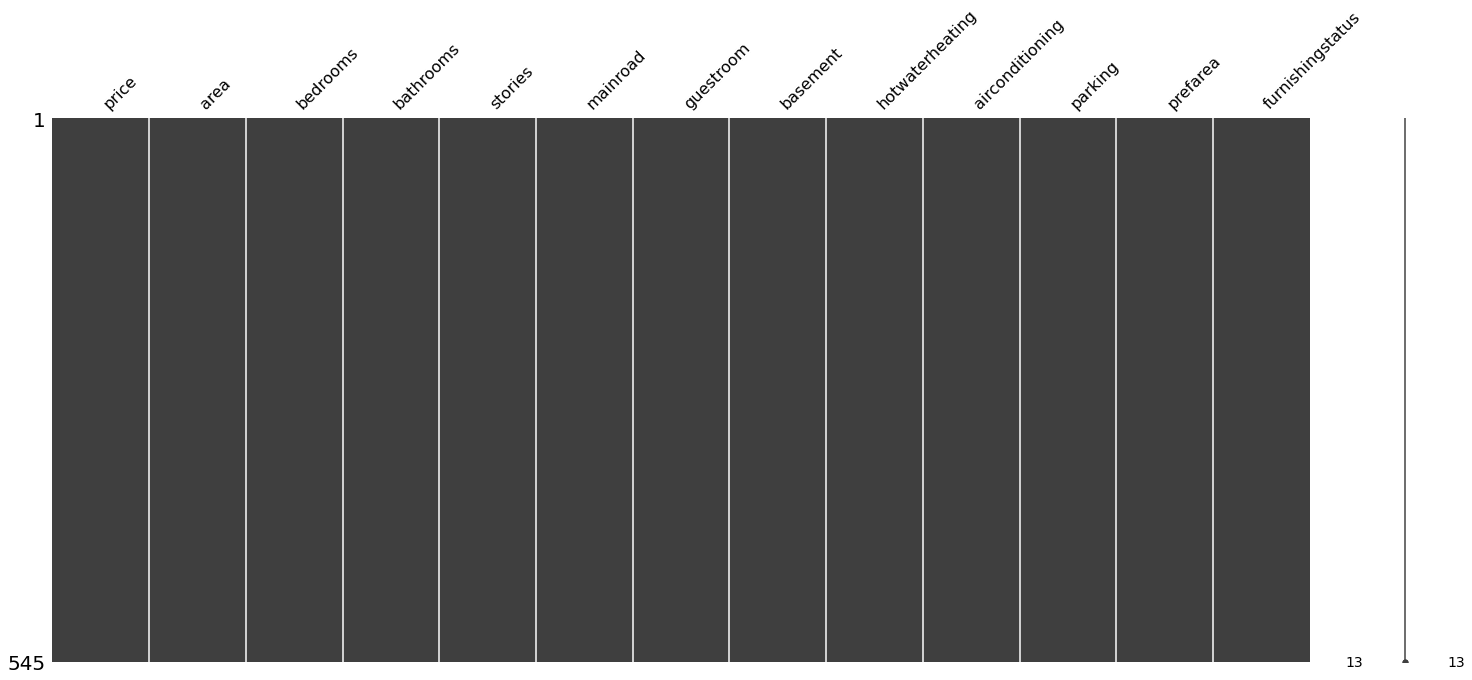

In [13]:
msno.matrix(data)
plt.show()

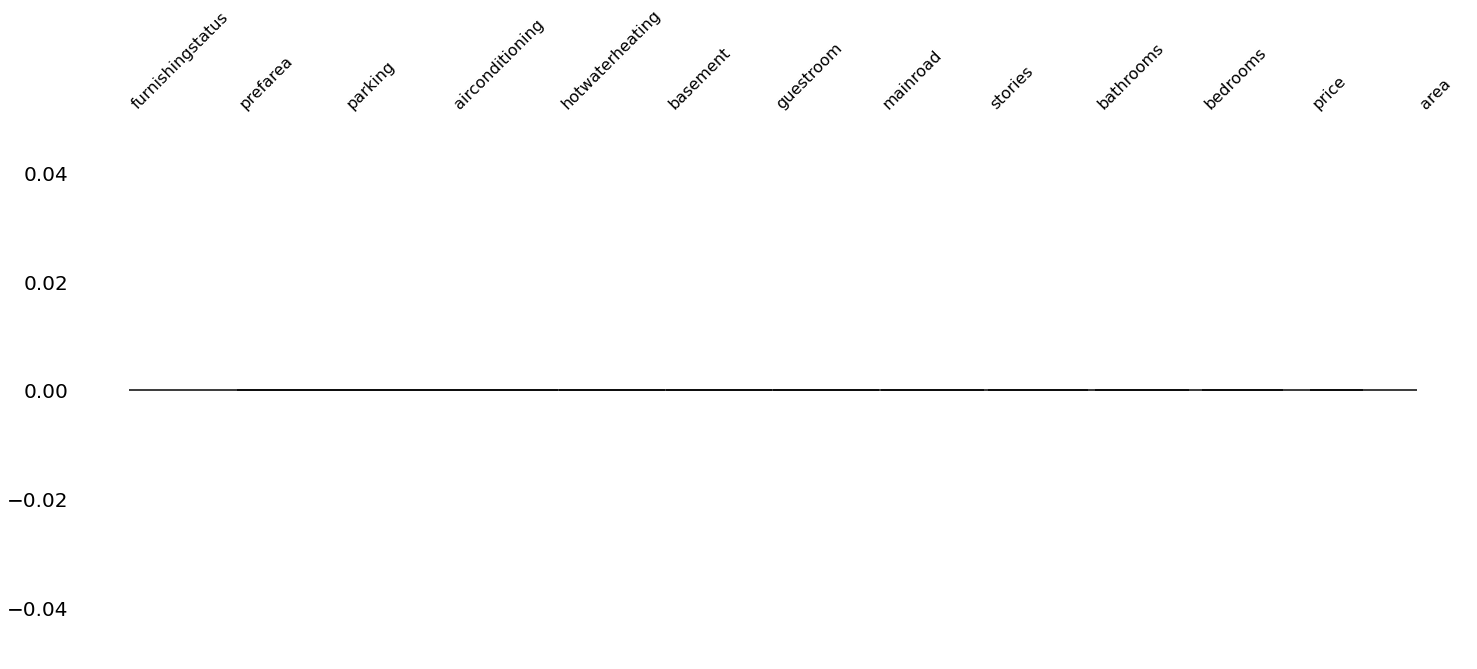

In [14]:
msno.dendrogram(data)
plt.show()

## 8. Details of columns 

### 1. Mainroad

In [15]:
data["mainroad"].unique()

array(['yes', 'no'], dtype=object)

In [16]:
data["mainroad"].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

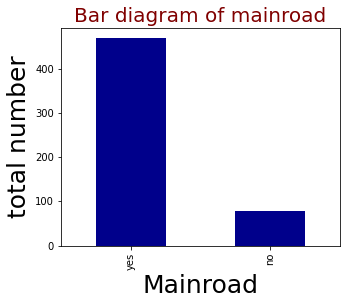

In [17]:
data["mainroad"].value_counts().plot(kind= "bar", 
       figsize =(5,4),
       color= "darkblue",
       width=0.5
      )

plt.title("Bar diagram of mainroad" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Mainroad",
            size = 25
          )

plt.ylabel("total number",
           size=25
          )

plt.show()

### 2.Guestroom

In [18]:
data["guestroom"].unique()

array(['no', 'yes'], dtype=object)

In [19]:
data["guestroom"].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

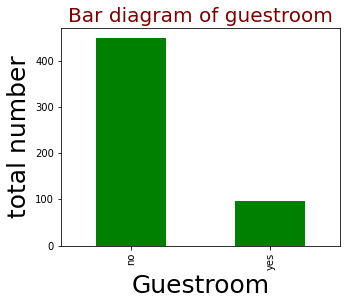

In [20]:
data["guestroom"].value_counts().plot(kind= "bar", 
       figsize =(5,4),
       color= "green",
       width=0.5
      )

plt.title("Bar diagram of guestroom" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Guestroom",
            size = 25
          )

plt.ylabel("total number",
           size=25
          )

plt.show()

### 3. Basement  

In [21]:
data["basement"].unique()

array(['no', 'yes'], dtype=object)

In [22]:
data["basement"].value_counts()

no     354
yes    191
Name: basement, dtype: int64

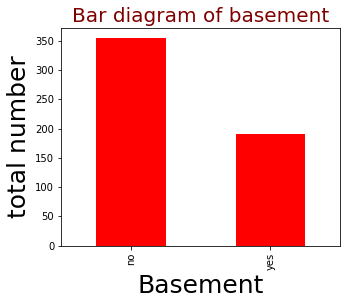

In [23]:
data["basement"].value_counts().plot(kind= "bar", 
       figsize =(5,4),
       color= "red",
       width=0.5
      )

plt.title("Bar diagram of basement" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Basement",
            size = 25
          )

plt.ylabel("total number",
           size=25
          )

plt.show()

### 4. Hotwaterheating

In [24]:
data["hotwaterheating"].unique()

array(['no', 'yes'], dtype=object)

In [25]:
data["hotwaterheating"].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

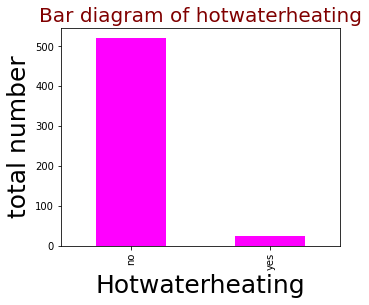

In [26]:
data["hotwaterheating"].value_counts().plot(kind= "bar", 
       figsize =(5,4),
       color= "magenta",
       width=0.5
      )

plt.title("Bar diagram of hotwaterheating" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Hotwaterheating",
            size = 25
          )

plt.ylabel("total number",
           size=25
          )

plt.show()

### 5. Airconditioning

In [27]:
data["airconditioning"].unique()

array(['yes', 'no'], dtype=object)

In [28]:
data["airconditioning"].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

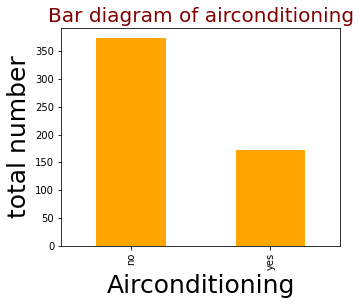

In [29]:
data["airconditioning"].value_counts().plot(kind= "bar", 
       figsize =(5,4),
       color= "orange",
       width=0.5
      )

plt.title("Bar diagram of airconditioning" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Airconditioning",
            size = 25
          )

plt.ylabel("total number",
           size=25
          )

plt.show()

### 6. Prefarea

In [30]:
data["prefarea"].unique()

array(['yes', 'no'], dtype=object)

In [31]:
data["prefarea"].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

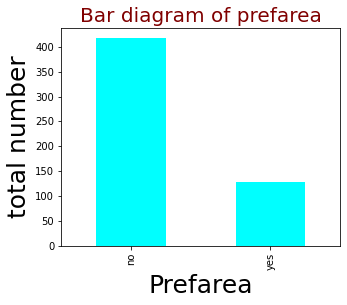

In [32]:
data["prefarea"].value_counts().plot(kind= "bar", 
       figsize =(5,4),
       color= "cyan",
       width=0.5
      )

plt.title("Bar diagram of prefarea" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Prefarea",
            size = 25
          )

plt.ylabel("total number",
           size=25
          )

plt.show()

### 7. Furnishingstatus

In [33]:
data["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [34]:
data["furnishingstatus"].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

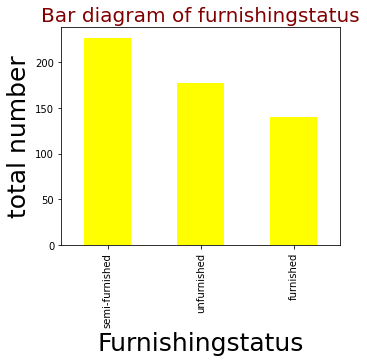

In [35]:
data["furnishingstatus"].value_counts().plot(kind= "bar", 
       figsize =(5,4),
       color= "yellow",
       width=0.5
      )

plt.title("Bar diagram of furnishingstatus" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Furnishingstatus",
            size = 25
          )

plt.ylabel("total number",
           size=25
          )

plt.show()

### 8. Bathrooms

In [36]:
data["bathrooms"].unique()

array([2, 4, 1, 3])

In [37]:
data["bathrooms"].value_counts()

1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64

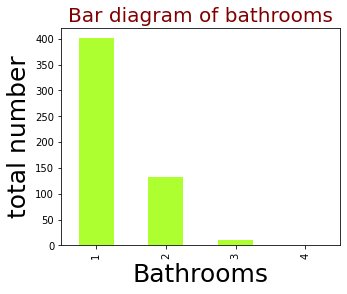

In [38]:
data["bathrooms"].value_counts().plot(kind= "bar", 
       figsize =(5,4),
       color= "greenyellow",
       width=0.5
      )

plt.title("Bar diagram of bathrooms" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Bathrooms",
            size = 25
          )

plt.ylabel("total number",
           size=25
          )

plt.show()

### 9. Bedrooms

In [39]:
data["bedrooms"].unique()

array([4, 3, 5, 2, 6, 1])

In [40]:
data["bedrooms"].value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

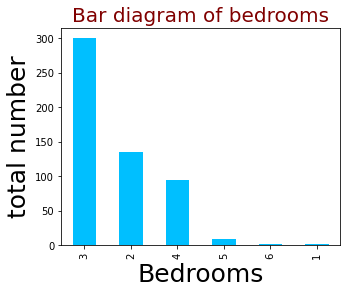

In [41]:
data["bedrooms"].value_counts().plot(kind= "bar", 
       figsize =(5,4),
       color= "deepskyblue",
       width=0.5
      )

plt.title("Bar diagram of bedrooms" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Bedrooms",
            size = 25
          )

plt.ylabel("total number",
           size=25
          )

plt.show()

### 10. Stories

In [42]:
data["stories"].unique()

array([3, 4, 2, 1])

In [43]:
data["stories"].value_counts()

2    238
1    227
4     41
3     39
Name: stories, dtype: int64

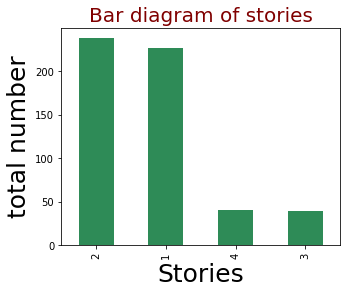

In [44]:
data["stories"].value_counts().plot(kind= "bar", 
       figsize =(5,4),
       color= "seagreen",
       width=0.5
      )

plt.title("Bar diagram of stories" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Stories",
            size = 25
          )

plt.ylabel("total number",
           size=25
          )

plt.show()

### 11. Parking

In [45]:
data["parking"].unique()

array([2, 3, 0, 1])

In [46]:
data["parking"].value_counts()

0    299
1    126
2    108
3     12
Name: parking, dtype: int64

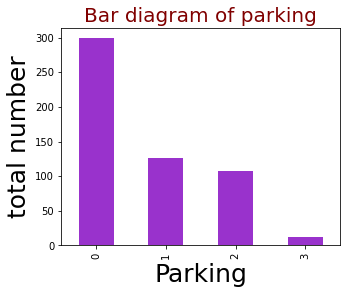

In [47]:
data["parking"].value_counts().plot(kind= "bar", 
       figsize =(5,4),
       color= "darkorchid",
       width=0.5
      )

plt.title("Bar diagram of parking" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Parking",
            size = 25
          )

plt.ylabel("total number",
           size=25
          )

plt.show()

# **Observations**



1.   Strength of the dataset - **545**.
2.   Number of random variables - **13**.
3.   None of the columns contains null value.
4.   Columns - **price**,**area**,**bedrooms**,**bathrooms**,**stories**,**parking** have numerical values.
5.   Columns - **mainroad**,**guestroom**,**basement**,**hotwaterheating**,**airconditioning**,**prefarea**,**furnishingstatus** have objective values. 
6.   There are **468** houses which are nearer to mainroads and the rest **77** houses are not nearer to mainroads. 
7.   The remaining **97** houses all have guestrooms whereas **448** properties have none. 
8.   The remaining **191** houses all have basements whereas **354** properties have none. 
9.   **520** houses lack hotwaterheater, while the remaining **25** houses all have hotwaterheater.
10.  **373** houses lack airconditions, while the remaining **172** houses all have airconditions.
11.  Only **417** houses are situated in a preferred area , while the rest **128** houses are not. 
12.  **140** houses are unfurnished ,**178** houses are unfurnished, and **227** houses are semi-furnished.
13.   **401** houses have one bathroom, **133** have two bathrooms, **10** have three bathrooms and **1** has four bathrooms.
14.   **2** houses have one bedroom, **136** have two bedrooms, **300** have three bedrooms ,**95** have four bedrooms , **10** have five bedrooms and **2** have six bedrooms.
15.    **227** houses have one store, **238** have two stories, **39** have three stories and **41** have four stories.
16.   **299** houses have no parking, **126** have one parking, **108** have two parkings and **12** have three parkings.








In [48]:
df=data.copy()

In [49]:
df[:]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Manipulation

## 1.Changed the categorical values to numerical values for the columns(mainroad, guestrooms, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus)

In [50]:
housing_map = {'yes': 1, 'no': 0}


### 1.Mainroad

In [51]:
df['mainroad'] = df['mainroad'].map(housing_map)

### 2.Guestroom

In [52]:
df['guestroom'] = df['guestroom'].map(housing_map)

### 3.Basement

In [53]:
df["basement"]= df["basement"].map(housing_map)

### 4.Hotwaterheating	

In [54]:
df["hotwaterheating"]= df["hotwaterheating"].map(housing_map)


### 5.Airconditioning

In [55]:
df["airconditioning"]= df["airconditioning"].map(housing_map)

### 6.Prefarea

In [56]:
df["prefarea"]= df["prefarea"].map(housing_map)

### 7.Furnishingstatus

In [57]:
df["furnishingstatus"]=df["furnishingstatus"].map({'unfurnished':0, 'furnished':1, 'semi-furnished':2})

In [58]:
print("After replacing the categorical values to numerical values the above dataset is given by: \n")

df[:]

After replacing the categorical values to numerical values the above dataset is given by: 



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [59]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.089908
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [60]:
l = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 0:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        l.append(column)
        print("------------------------------------------------")

price : Minimum: 1750000, Maximum: 13300000
------------------------------------------------
area : Minimum: 1650, Maximum: 16200
------------------------------------------------
bedrooms : Minimum: 1, Maximum: 6
------------------------------------------------
bathrooms : Minimum: 1, Maximum: 4
------------------------------------------------
stories : Minimum: 1, Maximum: 4
------------------------------------------------
mainroad : Minimum: 0, Maximum: 1
------------------------------------------------
guestroom : Minimum: 0, Maximum: 1
------------------------------------------------
basement : Minimum: 0, Maximum: 1
------------------------------------------------
hotwaterheating : Minimum: 0, Maximum: 1
------------------------------------------------
airconditioning : Minimum: 0, Maximum: 1
------------------------------------------------
parking : Minimum: 0, Maximum: 3
------------------------------------------------
prefarea : Minimum: 0, Maximum: 1
--------------------------

## 2. Correlation Matrix

The correlaton matrix of the given data set is: 
 



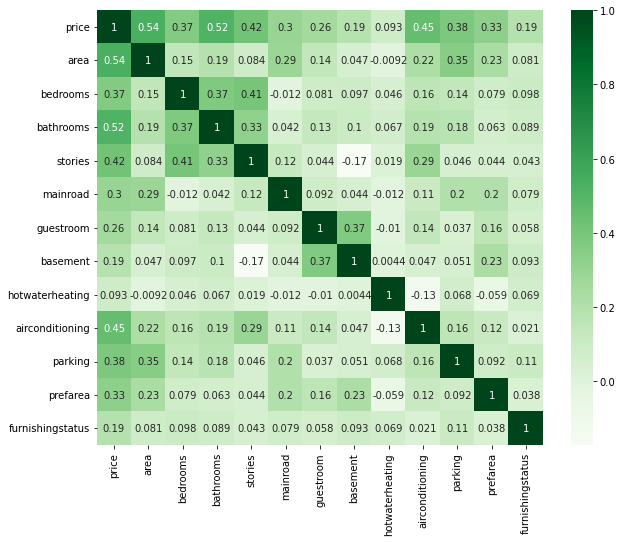

In [61]:
print("The correlaton matrix of the given data set is: \n \n")
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot= True, cmap="Greens")
plt.show()

## 3. Scatter plot

The pair plot of the given data set is: 
 



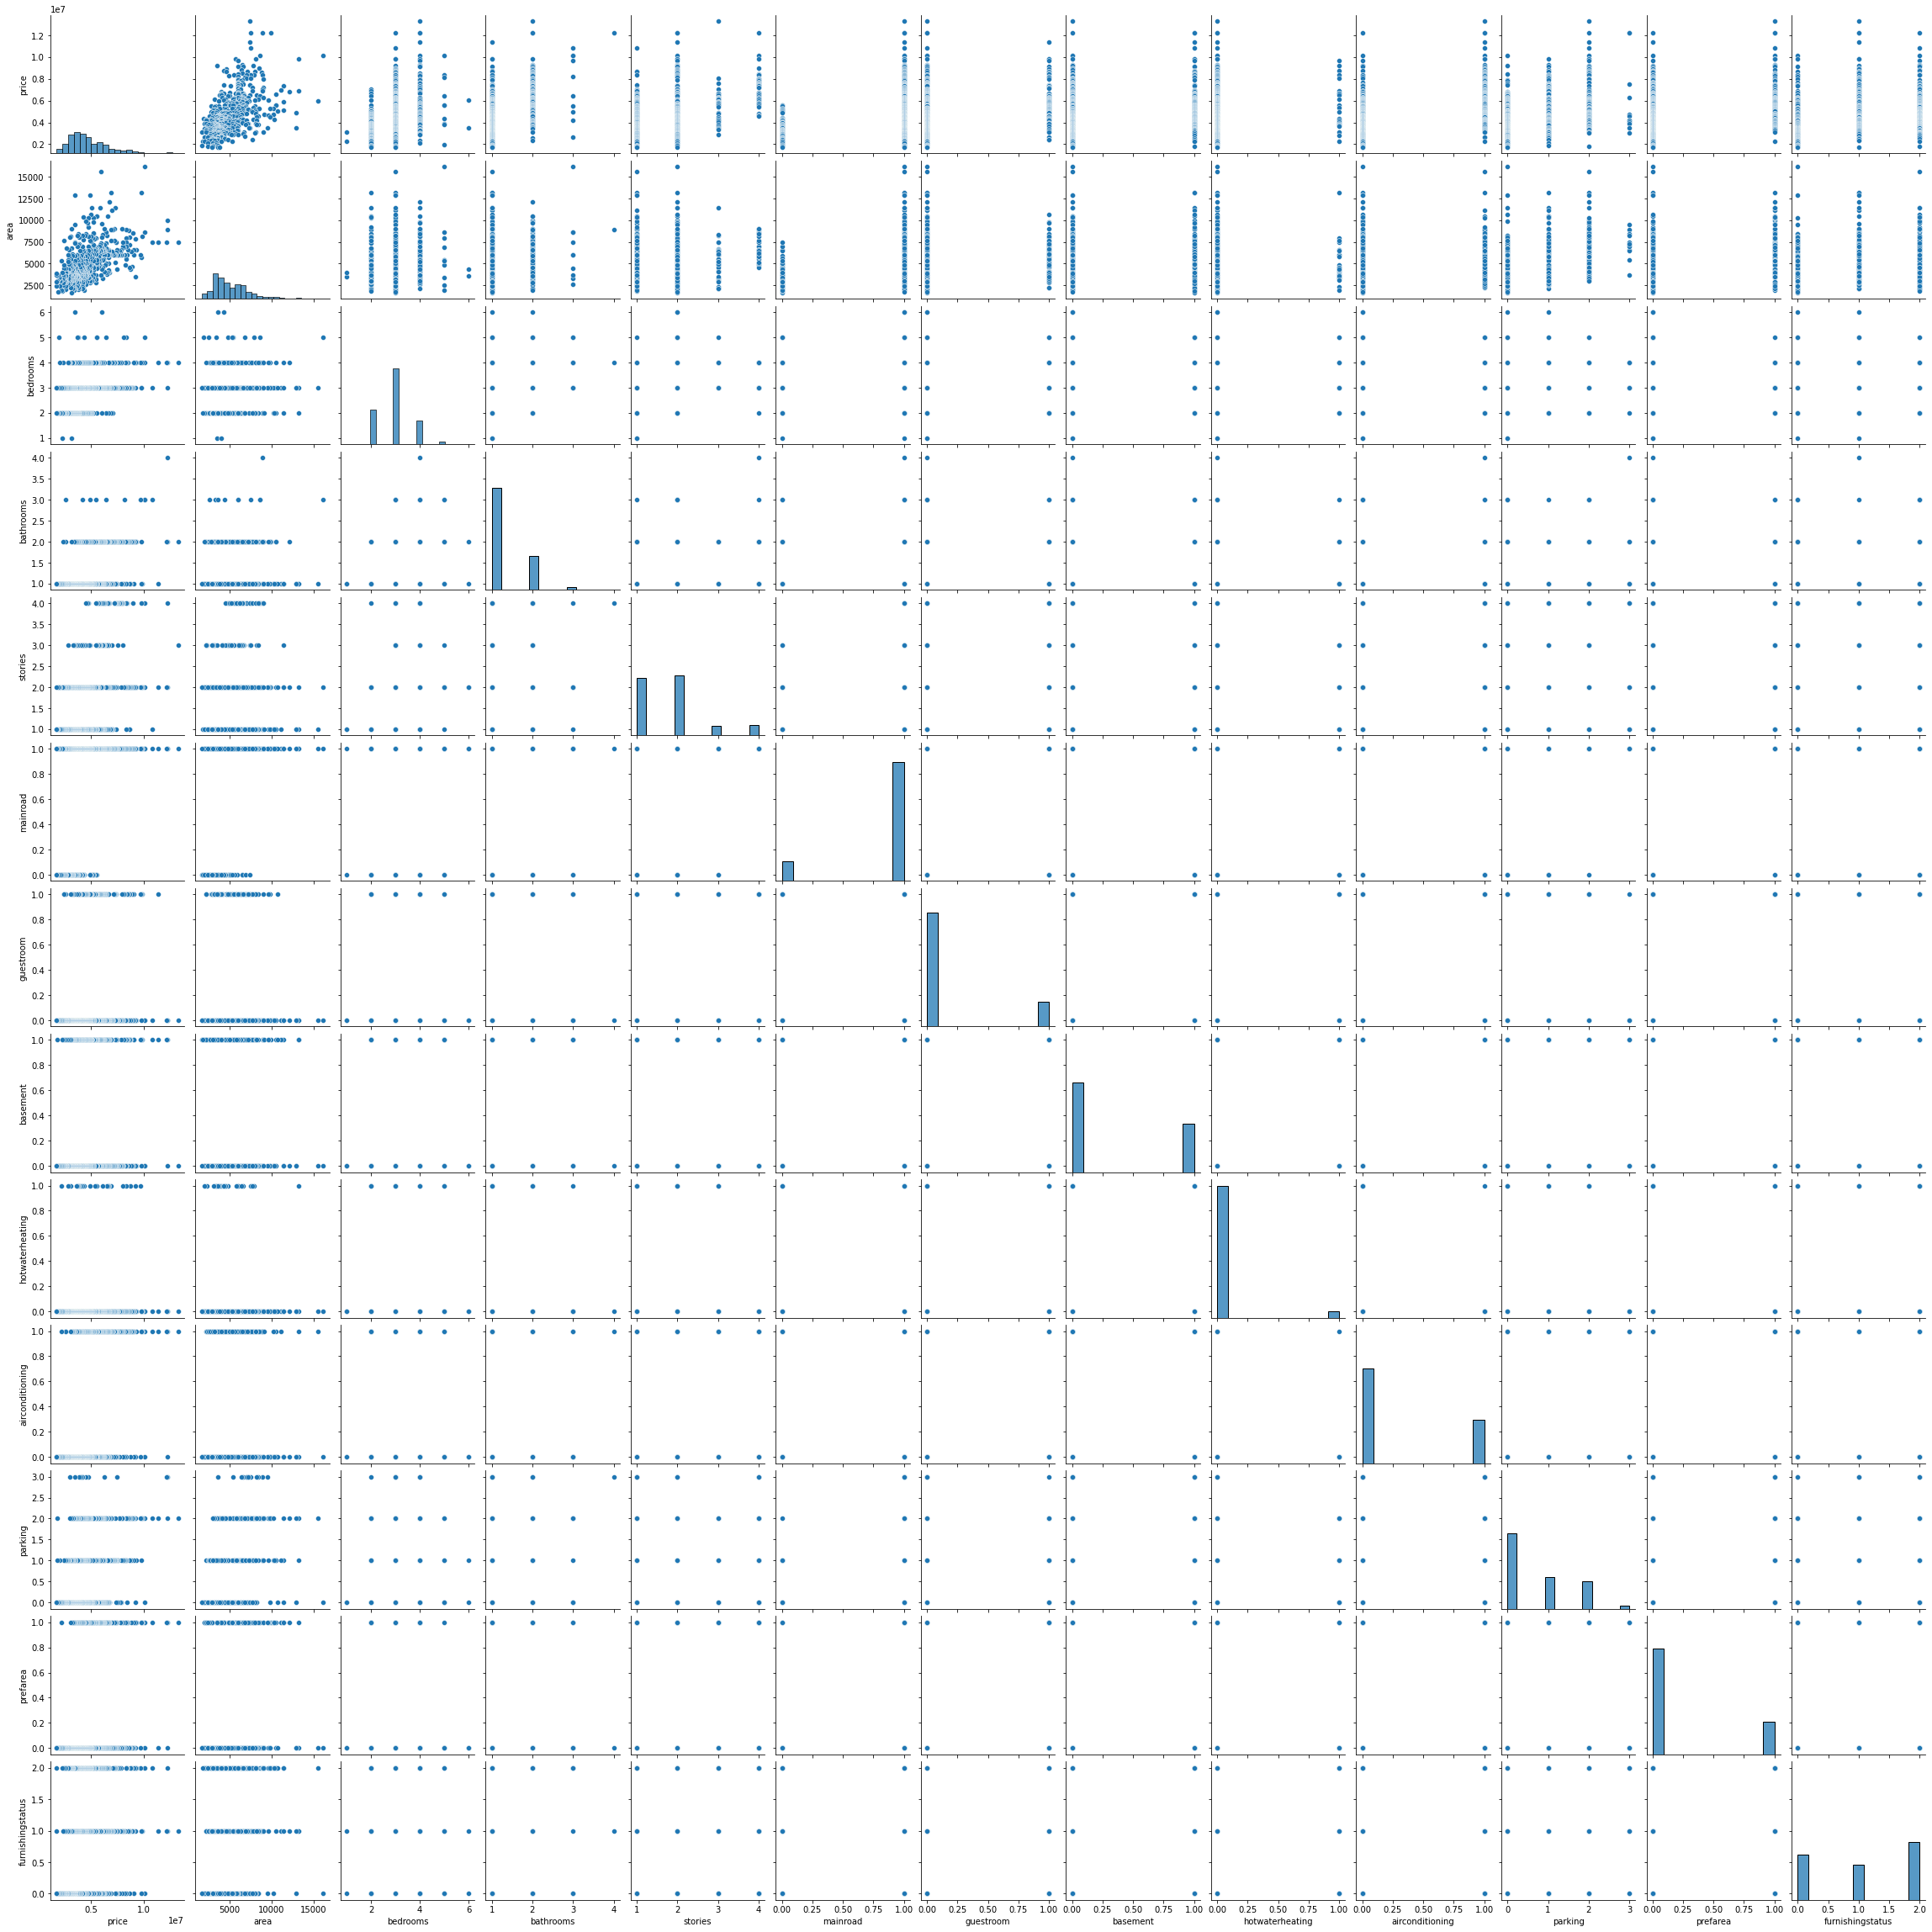

In [62]:
print("The pair plot of the given data set is: \n \n")
sns.pairplot(df)
plt.show()

## 4. Outlier

Boxplot of the dataset is given by: 



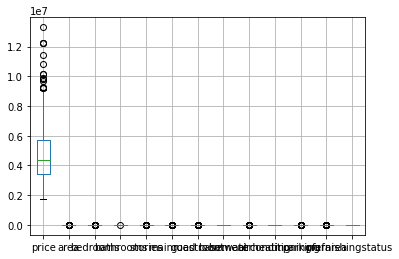

In [63]:
print("Boxplot of the dataset is given by: \n")

df.boxplot()
plt.show()

Boxplot of the dataset is given by: 



price




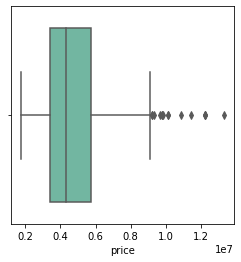



area




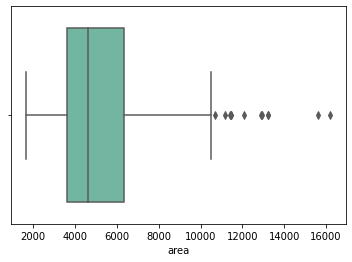



bedrooms




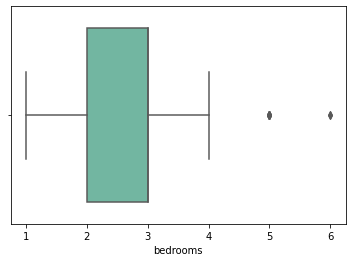



bathrooms




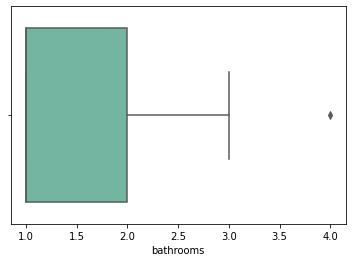



stories




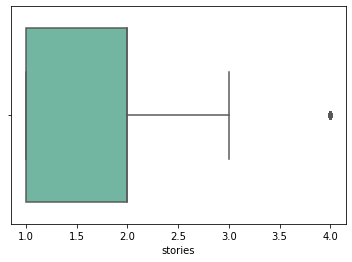



mainroad




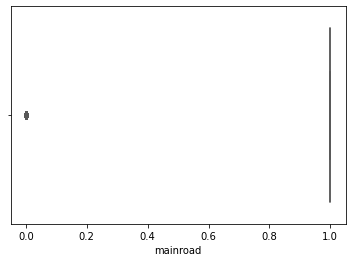



guestroom




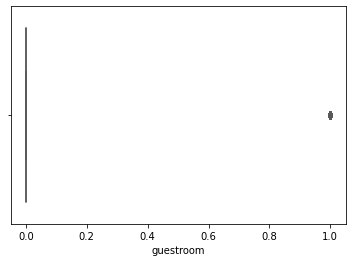



basement




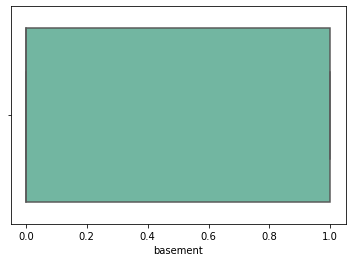



hotwaterheating




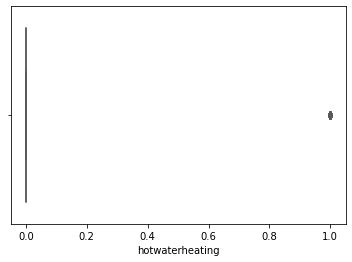



airconditioning




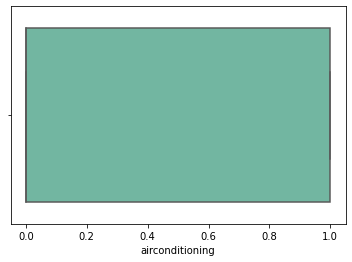



parking




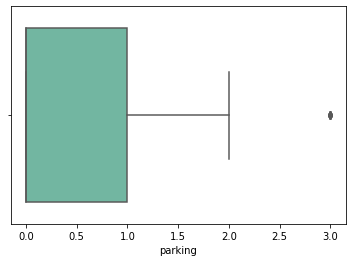



prefarea




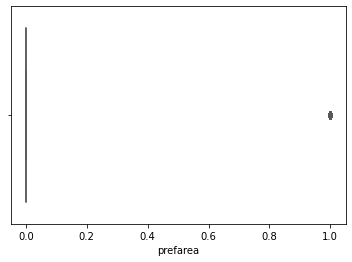



furnishingstatus




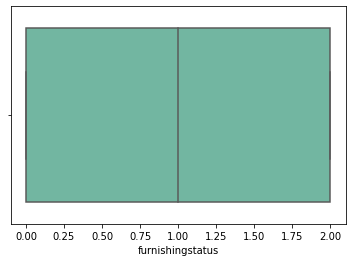

In [64]:
print("Boxplot of the dataset is given by: \n")

lst = ["price",	"area",	"bedrooms",	"bathrooms",	"stories",	"mainroad",	"guestroom",	"basement",	"hotwaterheating",	"airconditioning",	"parking",	"prefarea",	"furnishingstatus"]
fig= plt.figure(figsize=(4,4))

for i in lst:
    print("\n")
    print(i)
    print("\n")
    sns.boxplot(df[i],palette='Set2')
    plt.show()

### Observation

We can see from the above boxplots that 
1.   Price and area have a lot of outliers. 
2.   Bathrooms, stories, parking, guestrooms, hotwater heating, preferarea, and mainroad all have one outlier. The outlier for bathrooms and stories is at point 4, the one for parking is at point 3, the one for mainroad is at point 0, and the ones for guestrooms, hotwater heating, and preference area are all at point 1.
1.   Bedrooms has two outliers at points 5, 6. 
2.   There are no outliers in the furnishings, basement, or air conditioning.

That means all the points doesn't  appear frequently.





## 5. Outlier detection

### 1. How many values are there where bedrooms are more than 4?

In [65]:
count=0
for i in df["bedrooms"]:
  if i>4:
    count+=1
print(count)

12


### 2. How many values are there where bathrooms are more than 3?

In [66]:
count=0
for i in df["bathrooms"]:
  if i>3:
    count+=1
print(count)

1


### 3. How many values are there where stories are more than 3?

In [67]:
count=0
for i in df["stories"]:
  if i>3:
    count+=1
print(count)

41


### 4. How many values are there where mainroad is less than 1?

In [68]:
count=0
for i in df["mainroad"]:
  if i<1:
    count+=1
print(count)

77


### 5. How many values are there where guestroom is more than 0?

In [69]:
count=0
for i in df["guestroom"]:
  if i>0:
    count+=1
print(count)

97


### 6. How many values are there where hotwaterheating is more than 0?

In [70]:
count=0
for i in df["hotwaterheating"]:
  if i>0:
    count+=1
print(count)

25


### 7. How many values are there where prefarea is more than 0?

In [71]:
count=0
for i in df["prefarea"]:
  if i>0:
    count+=1
print(count)

128


### 8. How many values are there where parking is more than 0?

In [72]:
count=0
for i in df["parking"]:
  if i>2:
    count+=1
print(count)

12


### 9. How many values are there where area is more than 10000?

In [73]:
count=0
for i in df["area"]:
  if i>10000:
    count+=1
print(count)

18


## 6. Distribution of price

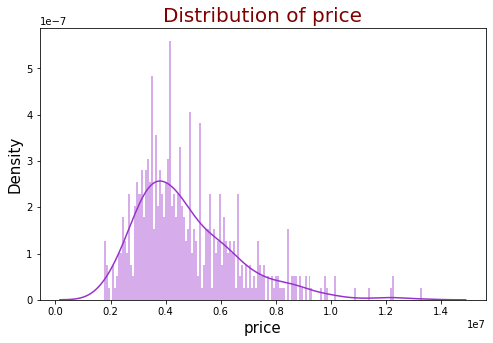

In [74]:
plt.figure(figsize=[8,5])
sns.distplot(df['price'],
             bins=160,
             hist=True,
             kde=True,
             color="darkorchid")

plt.title("Distribution of price" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("price",
            size = 15
          )

plt.ylabel("Density",
           size=15
          )


plt.show()      

#### The distribution is positively skewed, as can be seen from the distribution plot above, and the majority of the column, price data falls between 0.2 and 0.8.

# Splitting the dataset

In [75]:
x= df[df.columns[1:]]
y=df.price 

In [76]:
X_train,X_test, y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=12)

# Length of the sets

### 1. Train set

In [77]:
print("The length of the x train set: \n")

a=len(X_train)
print(a)

The length of the x train set: 

381


In [78]:
print("The length of the y train set: \n")

b=len(y_train)
print(b)

The length of the y train set: 

381


### 2. Test set

In [79]:
print("The length of the x test set: \n")

c=len(X_test)
print(c)

The length of the x test set: 

164


In [80]:
print("The length of the y test set: \n")

d=len(y_test)
print(d)

The length of the y test set: 

164


# Model

## 1. Linear Regression

In [81]:
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [82]:
lr.intercept_

-18002.30179089587

In [83]:
lr.coef_

array([2.09109193e+02, 1.53302060e+05, 7.50760510e+05, 5.13203060e+05,
       3.90001735e+05, 5.31984263e+05, 2.93874241e+05, 9.58162748e+05,
       8.27413390e+05, 2.63787327e+05, 5.54203257e+05, 1.75506960e+05])

In [84]:
newdf= pd.DataFrame( X_train.columns ,  lr.coef_ )
newdf=newdf.rename(columns={0: "Attribute" , 1 : "coeff"})

In [85]:
newdf[:]

,Attribute
209.109193,area
153302.059964,bedrooms
750760.510319,bathrooms
513203.059512,stories
390001.735008,mainroad
531984.263219,guestroom
293874.240728,basement
958162.748474,hotwaterheating
827413.389829,airconditioning
263787.327330,parking


## Train Data

In [101]:
y_train_pred= lr.predict(X_train)

### Model Evaluation

In [102]:
  r2 = r2_score(y_train, y_train_pred)
  ad_r2 = 1 - (1-r2)*(b-1)/(b-X_train.shape[1]-1)
  mae = mean_absolute_error(y_train, y_train_pred)
  mse = mean_squared_error(y_train, y_train_pred)
  rmse = np.sqrt(mse)
  print("R^2", r2)
  print("Adjusted R^2", ad_r2)
  print("MAE", mae)
  print("MSE",mse)
  print("RMSE", rmse)

R^2 0.6477041303237399
Adjusted R^2 0.6362162215299487
MAE 769794.2563957572
MSE 1064768470080.8779
RMSE 1031876.1893177291


### Visualizing the differences between actual prices and predicted values

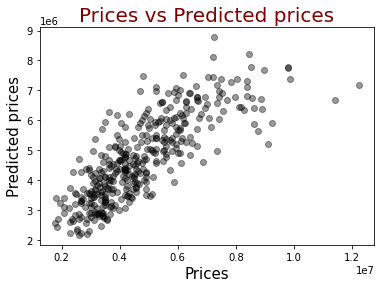

In [103]:
plt.scatter(y_train,
              y_train_pred, 
              color = 'black', 
             alpha = 0.4)
  
plt.title("Prices vs Predicted prices" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Prices",
            size = 15
          )

plt.ylabel("Predicted prices",
           size=15
          )


plt.show() 

### Residual

In [104]:
r=y_train-y_train_pred

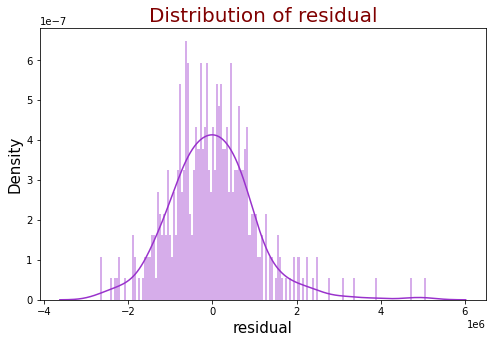

In [105]:
plt.figure(figsize=[8,5])
sns.distplot(r,
             bins=160,
             hist=True,
             kde=True,
             color="darkorchid")

plt.title("Distribution of residual" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("residual",
            size = 15
          )

plt.ylabel("Density",
           size=15
          )


plt.show()  

### Residual vs predicted 

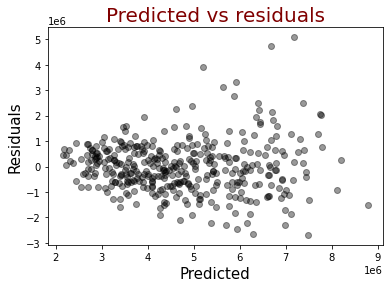

In [106]:
plt.scatter(y_train_pred,
              r, 
              color = 'black',  
              alpha = 0.4)
  
plt.title("Predicted vs residuals" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Predicted",
            size = 15
          )

plt.ylabel("Residuals",
           size=15
          )


plt.show() 

## Test data

In [107]:
y_test_pred= lr.predict(X_test)

In [108]:
sample = pd.DataFrame(y_test_pred,columns=['Predict'])
sample['Actual']=y_test

In [94]:
sample[:]

,Predict,Actual
0,5.145454e+06,13300000.0
1,3.528926e+06,12250000.0
2,5.896102e+06,NaN
3,4.949974e+06,12215000.0
4,5.026547e+06,NaN
...,...,...
159,6.071068e+06,NaN
160,2.179893e+06,NaN
161,7.236411e+06,5460000.0
162,3.595017e+06,NaN


### Model Evaluation

In [109]:
  lire_r2 = r2_score(y_test, y_test_pred)
  ad_r2 = 1 - (1-lire_r2)*(d-1)/(d-X_test.shape[1]-1)
  mae = mean_absolute_error(y_test, y_test_pred)
  mse = mean_squared_error(y_test, y_test_pred)
  rmse = np.sqrt(mse)
  print("R^2", lire_r2)
  print("Adjusted R^2", ad_r2)
  print("MAE", mae)
  print("MSE",mse)
  print("RMSE", rmse)

R^2 0.7011495093871651
Adjusted R^2 0.6773998015238935
MAE 802280.6406418359
MSE 1367675992684.0837
RMSE 1169476.8029696373


### Visualizing the differences between actual prices and predicted values

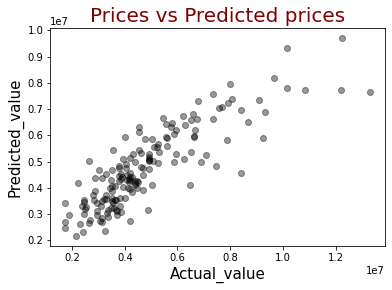

In [110]:
plt.scatter(y_test,
              y_test_pred, 
              color = 'black', 
             alpha = 0.4)
  
plt.title("Prices vs Predicted prices" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Actual_value",
            size = 15
          )

plt.ylabel("Predicted_value",
           size=15
          )


plt.show() 

In [97]:
sample.corr()

,Predict,Actual
Predict,1.000000,-0.055368
Actual,-0.055368,1.000000


## 2. Decision Tree Regressor

In [111]:
dtr= DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

## Train data

In [112]:
y_train_pred_1= dtr.predict(X_train)

### Model Evaluation

In [113]:
r2 = r2_score(y_train, y_train_pred_1)
ad_r2 = 1 - (1-r2)*(b-1)/(b-X_train.shape[1]-1)
mae = mean_absolute_error(y_train, y_train_pred_1)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
print("R^2", r2)
print("Adjusted R^2", ad_r2)
print("MAE", mae)
print("MSE",mse)
print("RMSE", rmse)

R^2 0.999339970614522
Adjusted R^2 0.9993184479171694
MAE 3674.540682414698
MSE 1064768470080.8779
RMSE 1031876.1893177291


### Visualizing the differences between actual prices and predicted values

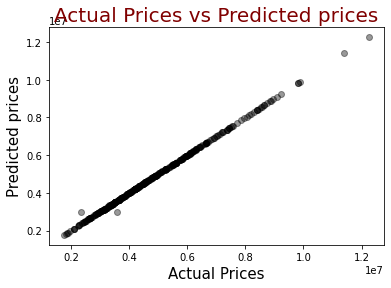

In [114]:
plt.scatter(y_train,
              y_train_pred_1, 
              color = 'black', 
             alpha = 0.4)
  
plt.title("Actual Prices vs Predicted prices" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Actual Prices",
            size = 15
          )

plt.ylabel("Predicted prices",
           size=15
          )


plt.show() 

### Residual

In [115]:
r=y_train-y_train_pred_1

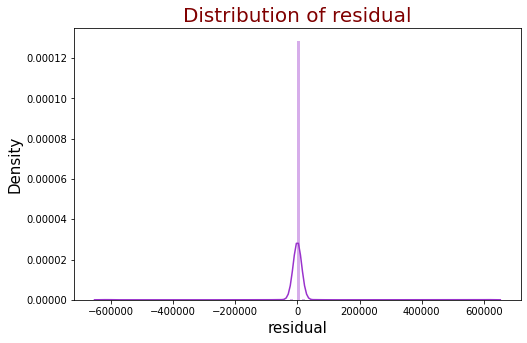

In [116]:
plt.figure(figsize=[8,5])
sns.distplot(r,
             bins=160,
             hist=True,
             kde=True,
             color="darkorchid")

plt.title("Distribution of residual" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("residual",
            size = 15
          )

plt.ylabel("Density",
           size=15
          )


plt.show()  

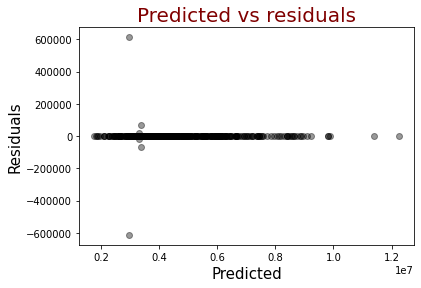

In [117]:
plt.scatter(y_train_pred_1,
              r, 
              color = 'black',  
              alpha = 0.4)
  
plt.title("Predicted vs residuals" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Predicted",
            size = 15
          )

plt.ylabel("Residuals",
           size=15
          )


plt.show() 

## Test data

In [118]:
y_test_pred_1= dtr.predict(X_test)

In [119]:
sample_1 = pd.DataFrame(y_test_pred_1,columns=['Predict'])
sample_1['Actual']=y_test

In [120]:
sample_1[:]

,Predict,Actual
0,5740000.0,13300000.0
1,3010000.0,12250000.0
2,7140000.0,NaN
3,4907000.0,12215000.0
4,3500000.0,NaN
...,...,...
159,5810000.0,NaN
160,2450000.0,NaN
161,7210000.0,5460000.0
162,3290000.0,NaN


### Model Evaluation

In [172]:
detr_r2 = r2_score(y_test, y_test_pred_1)
ad_r2 = 1 - (1-detr_r2)*(d-1)/(d-X_test.shape[1]-1)
mae = mean_absolute_error(y_test, y_test_pred_1)
mse = mean_squared_error(y_test, y_test_pred_1)
rmse = np.sqrt(mse)
print("R^2", detr_r2)
print("Adjusted R^2", ad_r2)
print("MAE", mae)
print("MSE",mse)
print("RMSE", rmse)

R^2 0.47759765087479233
Adjusted R^2 0.43608223240126587
MAE 1124574.756097561
MSE 2390751140997.561
RMSE 1546205.4006494612


### Visualizing the differences between actual prices and predicted values

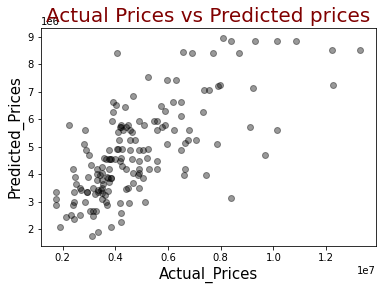

In [123]:
plt.scatter(y_test,
              y_test_pred_1, 
              color = 'black', 
             alpha = 0.4)
  
plt.title("Actual Prices vs Predicted prices" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Actual_Prices",
            size = 15
          )

plt.ylabel("Predicted_Prices",
           size=15
          )


plt.show() 

In [124]:
sample_1.corr()

,Predict,Actual
Predict,1.000000,-0.017617
Actual,-0.017617,1.000000


## 3. Random Forest Regressor

In [125]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

## Train data

In [126]:
y_train_pred_2= rfr.predict(X_train)

### Model Evaluation

In [127]:
r2 = r2_score(y_train, y_train_pred_2)
ad_r2 = 1 - (1-r2)*(b-1)/(b-X_train.shape[1]-1)
mae = mean_absolute_error(y_train, y_train_pred_2)
mse = mean_squared_error(y_train, y_train_pred_2)
rmse = np.sqrt(mse)
print("R^2", r2)
print("Adjusted R^2", ad_r2)
print("MAE", mae)
print("MSE",mse)
print("RMSE", rmse)

R^2 0.9394036332720999
Adjusted R^2 0.9374276647918423
MAE 305610.15529308835
MSE 183144641328.37347
RMSE 427954.0177733742


### Visualizing the differences between actual prices and predicted values

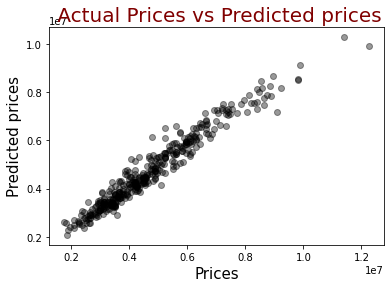

In [129]:
plt.scatter(y_train,
              y_train_pred_2, 
              color = 'black', 
             alpha = 0.4)
  
plt.title(" Actual Prices vs Predicted prices" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Prices",
            size = 15
          )

plt.ylabel("Predicted prices",
           size=15
          )


plt.show() 

### Residual

In [130]:
r=y_train-y_train_pred_2

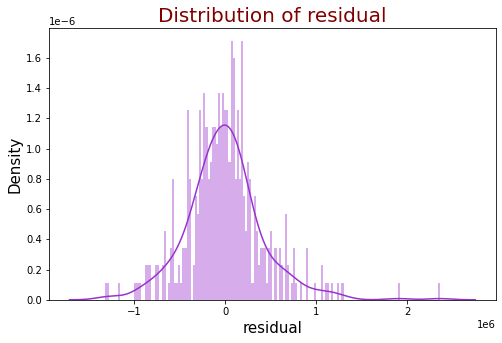

In [131]:
plt.figure(figsize=[8,5])
sns.distplot(r,
             bins=160,
             hist=True,
             kde=True,
             color="darkorchid")

plt.title("Distribution of residual" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("residual",
            size = 15
          )

plt.ylabel("Density",
           size=15
          )


plt.show()  

### Residual vs predicted

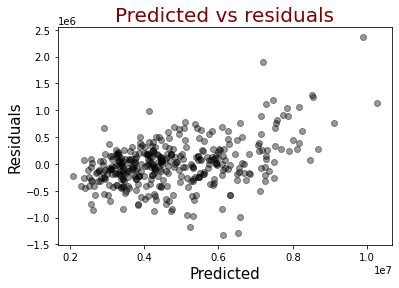

In [132]:
plt.scatter(y_train_pred_2,
              r, 
              color = 'black',  
              alpha = 0.4)
  
plt.title("Predicted vs residuals" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Predicted",
            size = 15
          )

plt.ylabel("Residuals",
           size=15
          )


plt.show() 

## Test data

In [133]:
y_test_pred_2= rfr.predict(X_test)

In [134]:
sample_2 = pd.DataFrame(y_test_pred_2,columns=['Predict'])
sample_2['Actual']=y_test

In [135]:
sample_2[:]

,Predict,Actual
0,4.329010e+06,13300000.0
1,3.583895e+06,12250000.0
2,6.003165e+06,NaN
3,4.645375e+06,12215000.0
4,4.302060e+06,NaN
...,...,...
159,6.156955e+06,NaN
160,2.578170e+06,NaN
161,7.417655e+06,5460000.0
162,2.766120e+06,NaN


### Model Evaluation

In [171]:
rafr_r2 = r2_score(y_test, y_test_pred_2)
ad_r2 = 1 - (1-rafr_r2)*(d-1)/(d-X_test.shape[1]-1)
mae = mean_absolute_error(y_test, y_test_pred_2)
mse = mean_squared_error(y_test, y_test_pred_2)
rmse = np.sqrt(mse)
print("R^2", rafr_r2)
print("Adjusted R^2", ad_r2)
print("MAE", mae)
print("MSE",mse)
print("RMSE", rmse)

R^2 0.6413452923542677
Adjusted R^2 0.6128429314817592
MAE 850498.3638211383
MSE 1641367334898.1616
RMSE 1281158.5908458647


### Visualizing the differences between actual prices and predicted values

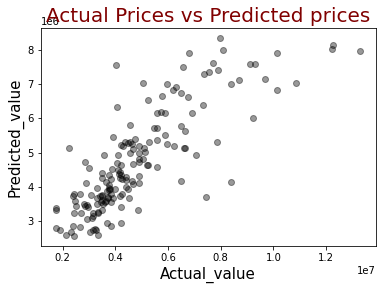

In [137]:
plt.scatter(y_test,
              y_test_pred_2, 
              color = 'black', 
             alpha = 0.4)
  
plt.title("Actual Prices vs Predicted prices" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Actual_value",
            size = 15
          )

plt.ylabel("Predicted_value",
           size=15
          )


plt.show() 

In [138]:
sample_2.corr()

,Predict,Actual
Predict,1.00000,-0.07139
Actual,-0.07139,1.00000


## 4. XGBRegressor

In [140]:
xgb=XGBRegressor()
xgb.fit(X_train, y_train)

[15:47:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

## Train data

In [142]:
y_train_pred_3= xgb.predict(X_train)

### Model Evaluation

In [143]:
r2 = r2_score(y_train, y_train_pred_3)
ad_r2 = 1 - (1-r2)*(b-1)/(b-X_train.shape[1]-1)
mae = mean_absolute_error(y_train, y_train_pred_3)
mse = mean_squared_error(y_train, y_train_pred_3)
rmse = np.sqrt(mse)
print("R^2", r2)
print("Adjusted R^2", ad_r2)
print("MAE", mae)
print("MSE",mse)
print("RMSE", rmse)

R^2 0.8354901035633566
Adjusted R^2 0.8301256504186835
MAE 529322.1233595801
MSE 497209776836.0869
RMSE 705131.0352240121


### Visualizing the differences between actual prices and predicted values

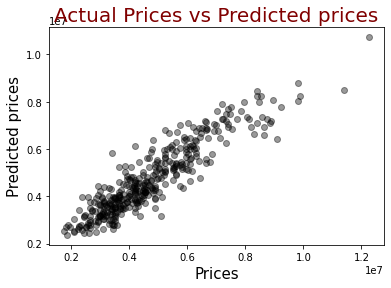

In [144]:
plt.scatter(y_train,
              y_train_pred_3, 
              color = 'black', 
             alpha = 0.4)
  
plt.title("Actual Prices vs Predicted prices" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Prices",
            size = 15
          )

plt.ylabel("Predicted prices",
           size=15
          )


plt.show() 

### Residual

In [145]:
r=y_train-y_train_pred_3

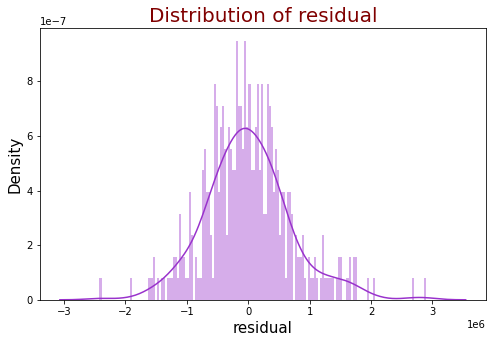

In [146]:
plt.figure(figsize=[8,5])
sns.distplot(r,
             bins=160,
             hist=True,
             kde=True,
             color="darkorchid")

plt.title("Distribution of residual" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("residual",
            size = 15
          )

plt.ylabel("Density",
           size=15
          )


plt.show()  

### Residual vs predicted

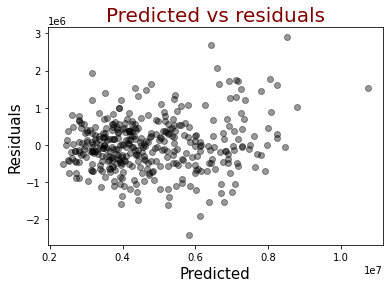

In [147]:
plt.scatter(y_train_pred_3,
              r, 
              color = 'black',  
              alpha = 0.4)
  
plt.title("Predicted vs residuals" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Predicted",
            size = 15
          )

plt.ylabel("Residuals",
           size=15
          )


plt.show() 

## Test data

In [148]:
y_test_pred_3= xgb.predict(X_test)

In [149]:
sample_3 = pd.DataFrame(y_test_pred_3,columns=['Predict'])
sample_3['Actual']=y_test

In [150]:
sample_3[:]

,Predict,Actual
0,6196132.00,13300000.0
1,3695732.00,12250000.0
2,6215473.50,NaN
3,4725173.50,12215000.0
4,4402584.00,NaN
...,...,...
159,5985097.50,NaN
160,2463875.75,NaN
161,7684806.50,5460000.0
162,2772504.25,NaN


### Model Evaluation

In [170]:
xgbr_r2 = r2_score(y_test, y_test_pred_3)
ad_r2 = 1 - (1-xgbr_r2)*(d-1)/(d-X_test.shape[1]-1)
mae = mean_absolute_error(y_test, y_test_pred_3)
mse = mean_squared_error(y_test, y_test_pred_3)
rmse = np.sqrt(mse)
print("R^2", xgbr_r2)
print("Adjusted R^2", ad_r2)
print("MAE", mae)
print("MSE",mse)
print("RMSE", rmse)

R^2 0.6031394517599786
Adjusted R^2 0.5716008651448776
MAE 859206.080792683
MSE 1816214666933.5605
RMSE 1347670.0883129968


### Visualizing the differences between actual prices and predicted values

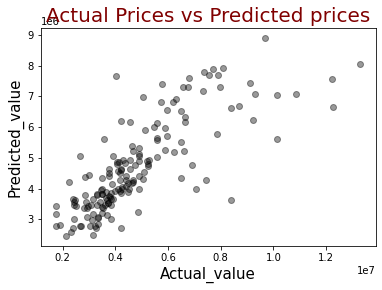

In [152]:
plt.scatter(y_test,
              y_test_pred_3, 
              color = 'black', 
             alpha = 0.4)
  
plt.title("Actual Prices vs Predicted prices" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Actual_value",
            size = 15
          )

plt.ylabel("Predicted_value",
           size=15
          )


plt.show() 

In [153]:
sample_3.corr()

,Predict,Actual
Predict,1.000000,0.058875
Actual,0.058875,1.000000


## 5. SVM Regressor

### Creating scaled set to be used in model to improve our results

In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_1= sc.fit_transform(X_train)
X_test_1= sc.transform(X_test)

In [155]:
sv=svm.SVR()
sv.fit(X_train_1, y_train)

SVR()

## Train data

In [156]:
y_train_pred_4= sv.predict(X_train_1)

### Model Evaluation

In [158]:
r2 = r2_score(y_train, y_train_pred_4)
ad_r2 = 1 - (1-r2)*(b-1)/(b-X_train_1.shape[1]-1)
mae = mean_absolute_error(y_train, y_train_pred_4)
mse = mean_squared_error(y_train, y_train_pred_4)
rmse = np.sqrt(mse)
print("R^2", r2)
print("Adjusted R^2", ad_r2)
print("MAE", mae)
print("MSE",mse)
print("RMSE", rmse)

R^2 -0.03528152838868337
Adjusted R^2 -0.06904070866222733
MAE 1344914.9740462946
MSE 3129003840148.324
RMSE 1768899.0474722758


### Visualizing the differences between actual prices and predicted values

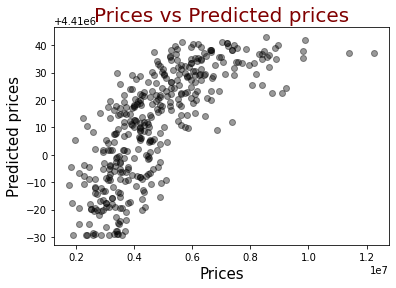

In [159]:
plt.scatter(y_train,
              y_train_pred_4, 
              color = 'black', 
             alpha = 0.4)
  
plt.title("Prices vs Predicted prices" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Prices",
            size = 15
          )

plt.ylabel("Predicted prices",
           size=15
          )


plt.show() 

### Residual

In [160]:
r=y_train-y_train_pred_4

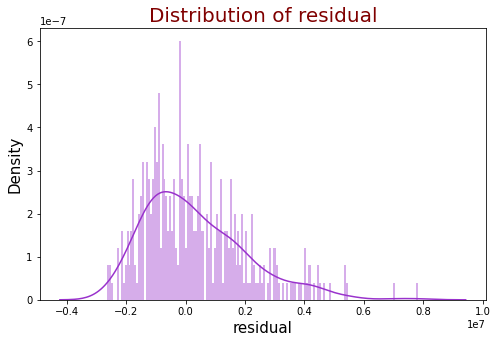

In [161]:
plt.figure(figsize=[8,5])
sns.distplot(r,
             bins=160,
             hist=True,
             kde=True,
             color="darkorchid")

plt.title("Distribution of residual" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("residual",
            size = 15
          )

plt.ylabel("Density",
           size=15
          )


plt.show()  

### Residual vs predicted

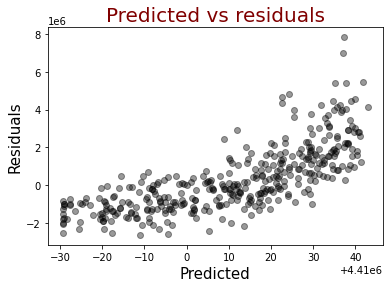

In [162]:
plt.scatter(y_train_pred_4,
              r, 
              color = 'black',  
              alpha = 0.4)
  
plt.title("Predicted vs residuals" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Predicted",
            size = 15
          )

plt.ylabel("Residuals",
           size=15
          )


plt.show() 

## Test data

In [163]:
y_test_pred_4= lr.predict(X_test_1)

In [165]:
sample_4 = pd.DataFrame(y_test_pred_4,columns=['Predict'])
sample_4['Actual']=y_test

In [166]:
sample_4[:]

,Predict,Actual
0,2.685609e+06,13300000.0
1,-2.250203e+06,12250000.0
2,1.175035e+06,NaN
3,6.882952e+05,12215000.0
4,6.793332e+05,NaN
...,...,...
159,2.109644e+06,NaN
160,-4.081572e+06,NaN
161,3.368311e+06,5460000.0
162,-8.459499e+05,NaN


### Model Evaluation

In [167]:
svmr_r2 = r2_score(y_test, y_test_pred_4)
ad_r2 = 1 - (1-svmr_r2)*(d-1)/(d-X_test_1.shape[1]-1)
mae = mean_absolute_error(y_test, y_test_pred_4)
mse = mean_squared_error(y_test, y_test_pred_4)
rmse = np.sqrt(mse)
print("R^2", svmr_r2)
print("Adjusted R^2", ad_r2)
print("MAE", mae)
print("MSE",mse)
print("RMSE", rmse)

R^2 -4.581418285541357
Adjusted R^2 -5.024974705584379
MAE 4811648.091857027
MSE 25543112807374.562
RMSE 5054019.470419021


### Visualizing the differences between actual prices and predicted values

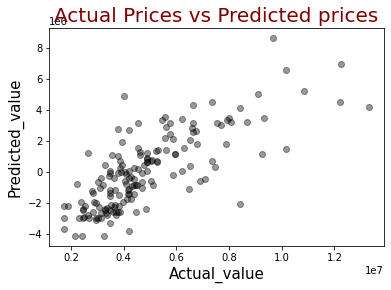

In [168]:
plt.scatter(y_test,
              y_test_pred_4, 
              color = 'black', 
             alpha = 0.4)
  
plt.title("Actual Prices vs Predicted prices" ,
          size= 20,
          color="Maroon"
         )

plt.xlabel("Actual_value",
            size = 15
          )

plt.ylabel("Predicted_value",
           size=15
          )


plt.show() 

In [169]:
sample_4.corr()

,Predict,Actual
Predict,1.000000,0.037793
Actual,0.037793,1.000000


# Evaluation and Comparison of all the above 5 models 

In [173]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Regressor','Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [lire_r2, detr_r2, rafr_r2, xgbr_r2, svmr_r2]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
0,Linear Regression,70.114951
2,Random Forest,64.134529
3,XGBoost,60.313945
1,Decision Tree Regressor,47.759765
4,Support Vector Machines,-458.141829


### From the above chart we can see that linear regression works best for this dataset.

### Note:


1.  **𝑅^2** : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

2. **Adjusted 𝑅^2** :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

3. **MAE** : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y. 

4. **MSE**: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

5. **RMSE**: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. 

